In [1]:
import numpy as np
import os
import random
import torch

from torch.utils.data import DataLoader, random_split

from Callbacks import EarlyStopping
from TransferLearningModel import TransferLearningModel
from utils import DICOMCoarseDataset, TransformDataset, TensorFolderDataset, find_overlapping_images, TensorFolderDataset

In [2]:
scenario = 3
data_augmentation = True
save_folder_base = f"./data/scenario{scenario}/"

In [3]:
BASE_DIR = "C:/Users/Dominik Hahn/OneDrive/Studium/Master/Masterarbeit/Daten"
# BASE_DIR = "C:/Users/domin/OneDrive/Studium/Master/Masterarbeit/Daten"
seed = 41
batch_size = 32
classes = ["nodule", "non-nodule"]
train_ratio = 0.6

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

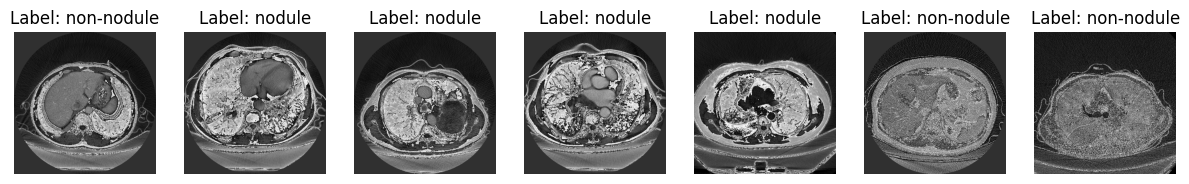

In [4]:
dataset = DICOMCoarseDataset(root_dir=BASE_DIR, num_images_per_class=len(os.listdir(os.path.join(BASE_DIR, "nodule"))), classes=classes, scenario=scenario)
# dataset = DICOMCoarseDataset(root_dir=BASE_DIR, num_images_per_class=10, classes=classes, scenario=scenario)
dataset.visualize_images(num_images=7)

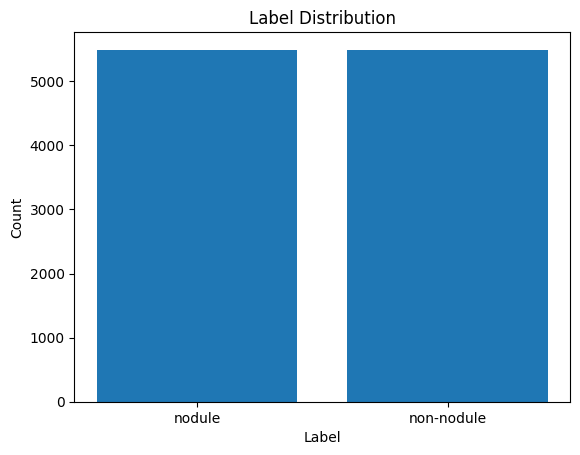

In [5]:
dataset.display_label_distribution()

In [6]:
train_size = int(train_ratio * len(dataset))
val_size = int(((1-train_ratio)/2) * len(dataset)) 
test_size = len(dataset) - train_size - val_size

print(f"Train size: {train_size} --- Validation size: {val_size} --- Test size: {test_size}")

Train size: 6591 --- Validation size: 2197 --- Test size: 2198


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9004807..2.4711628].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.0844622].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.960821..2.232609].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9426929..2.3337429].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6261196].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.991935..2.485484].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0473218..2.0

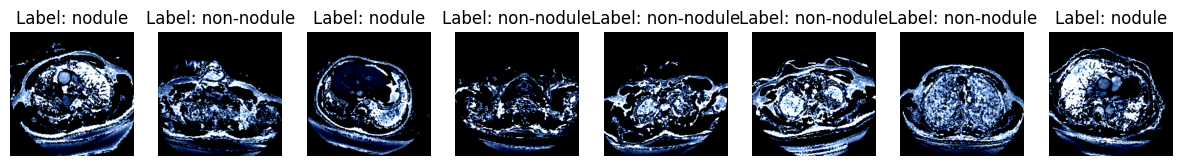

In [7]:
from utils import display_data_loader_batch
display_model = TransferLearningModel(classes, "unet", data_augmentation=True, fine=False, scenario=1)
display_model.train_transforms, display_model.test_transforms = display_model.get_transforms()
train_indices, val_indices, test_indices = random_split(dataset, [train_size, val_size, test_size])
train_dataset = TransformDataset(torch.utils.data.Subset(dataset, train_indices.indices), transform=display_model.train_transforms)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
display_data_loader_batch(train_loader, classes)

In [8]:
train_dataset_base = TensorFolderDataset(os.path.join(save_folder_base, "train_filtered"))
val_dataset_base = TensorFolderDataset(os.path.join(save_folder_base, "val_filtered"))
test_dataset_base = TensorFolderDataset(os.path.join(save_folder_base, "test"))

find_overlapping_images(train_dataset_base, test_dataset_base)
find_overlapping_images(val_dataset_base, test_dataset_base)

c:\Users\Dominik Hahn\Documents\GitHub\Masterarbeit\Final Models\utils.py:551: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


Found 0 overlapping images
Found 0 overlapping images


[]

Epoch 1/50 ----- Loss: 0.6913, Accuracy: 53.16% ----- Validation Loss: 0.6876, Validation Accuracy: 55.83%
Epoch 2/50 ----- Loss: 0.6902, Accuracy: 53.59% ----- Validation Loss: 0.6871, Validation Accuracy: 55.83%
Epoch 3/50 ----- Loss: 0.6899, Accuracy: 53.59% ----- Validation Loss: 0.6868, Validation Accuracy: 55.83%
Epoch 4/50 ----- Loss: 0.6897, Accuracy: 53.59% ----- Validation Loss: 0.6861, Validation Accuracy: 55.83%
Epoch 5/50 ----- Loss: 0.6897, Accuracy: 53.59% ----- Validation Loss: 0.6863, Validation Accuracy: 55.83%
Epoch 6/50 ----- Loss: 0.6892, Accuracy: 53.59% ----- Validation Loss: 0.6860, Validation Accuracy: 55.83%
Epoch 7/50 ----- Loss: 0.6891, Accuracy: 53.59% ----- Validation Loss: 0.6860, Validation Accuracy: 55.83%
Epoch 8/50 ----- Loss: 0.6889, Accuracy: 53.59% ----- Validation Loss: 0.6858, Validation Accuracy: 55.83%
Epoch 9/50 ----- Loss: 0.6887, Accuracy: 53.59% ----- Validation Loss: 0.6854, Validation Accuracy: 55.83%
Epoch 10/50 ----- Loss: 0.6884, Accur

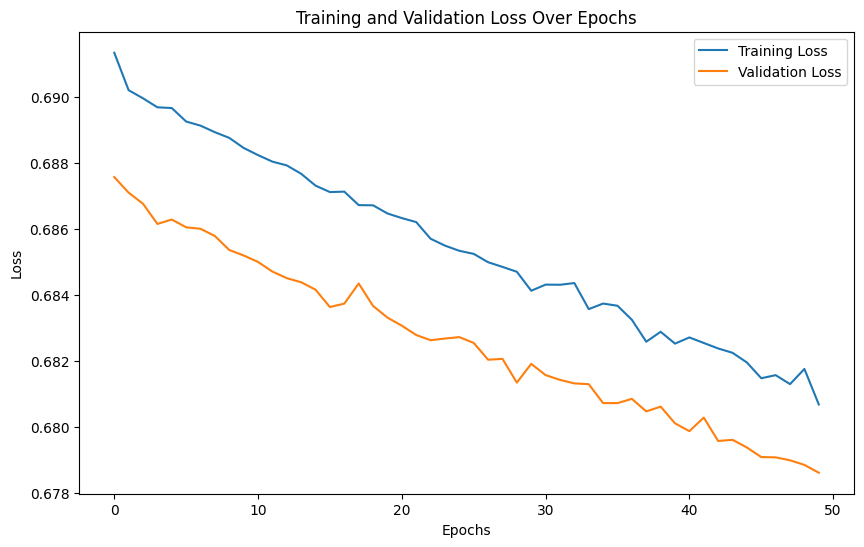

In [9]:
model = TransferLearningModel(classes, "unet", data_augmentation=data_augmentation, fine=False, scenario=scenario)

# Ensure transforms are correctly applied based on model requirements
model.train_transforms, model.test_transforms = model.get_transforms()
# Apply specific transforms to each subset
train_dataset = TransformDataset(train_dataset_base, transform=model.train_transforms)
val_dataset = TransformDataset(val_dataset_base, transform=model.test_transforms)
test_dataset = TransformDataset(test_dataset_base, transform=model.test_transforms)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize early stopping
early_stopping = EarlyStopping(patience=10)

# Train the current model
model.train(train_loader, val_loader, early_stopping, epochs=50)

c:\Users\Dominik Hahn\Documents\GitHub\Masterarbeit\Final Models\utils.py:551: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


Evaluation Accuracy on unseen data: 53.59417652411283


<Figure size 1000x800 with 0 Axes>

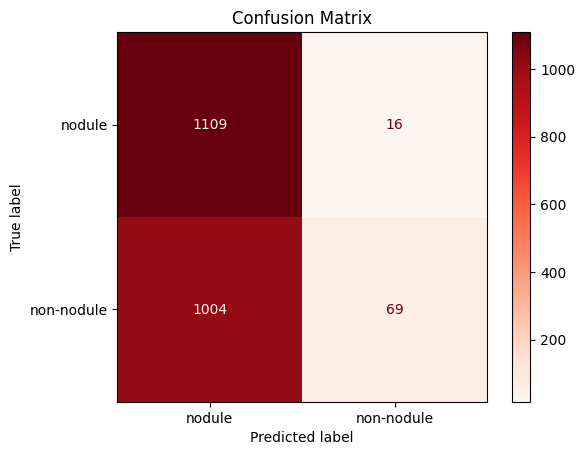

In [12]:
model.evaluate(test_loader)

c:\Users\Dominik Hahn\Documents\GitHub\Masterarbeit\Final Models\utils.py:551: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


Evaluation Accuracy on unseen data: 54.57441966317706


<Figure size 1000x800 with 0 Axes>

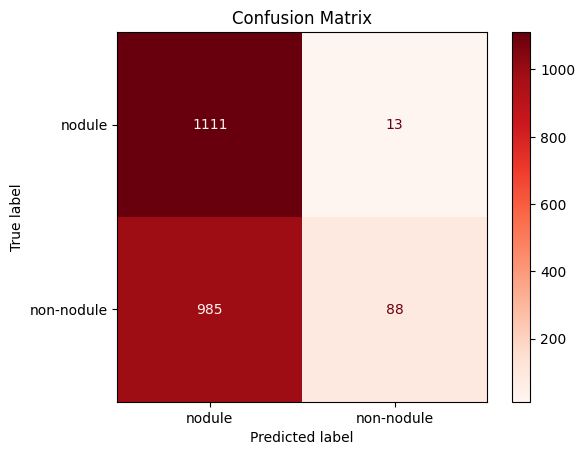

In [13]:
comparison_base = f"./data/scenario1/test"
comparison_dataset_base = TensorFolderDataset(comparison_base)
comparison_dataset = TransformDataset(comparison_dataset_base, transform=model.train_transforms)
comparison_loader = DataLoader(comparison_dataset, batch_size=batch_size, shuffle=False)
model.evaluate(comparison_loader)
